# Step2: Requests & Selenium to Get Online Data

## 4-1 Use requests to get online data
### 4-1-1 requests's GET

In python, install requests: 

* pip install requests

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

* try using get() to send HTTP request

In [3]:
url = "https://fchart.github.io/test.html"
response = requests.get(url)
print(response)

<Response [200]>


* some property you can use from the response
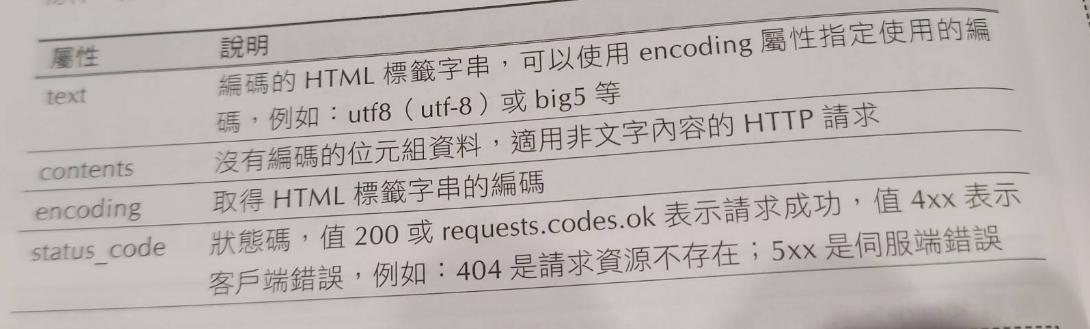

In [4]:
import requests 
 
url = "https://fchart.github.io/test.html"
response = requests.get(url)
if response.status_code == 200:
    print(response.text)
    print("Decode: ", response.encoding)
else:
    print("Error, http request fail")



<html>
<head>
<meta charset="utf-8"/>
<title>測試的HTML5網頁</title>
</head>
<body>
<h3>從網路取得資料</h3><hr/>
<div><p>使用Requests套件送出HTTP請求</p></div>
</body>
</html>
Decode:  utf-8


* If the url contain parameters, there are two ways:

1. Append after URL

http://httpbin.org/get?name=Steven&grade=100

2. in get(), assign "dict" to use params, ex:

In [5]:
import requests 
 
url_params = {'name': 'Steven', 'grade': 100}
r = requests.get("http://httpbin.org/get", params=url_params)
if r.status_code == 200:
    print(r.text)
else:
    print("Error, request fail...")



{
  "args": {
    "grade": "100", 
    "name": "Steven"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.28.1", 
    "X-Amzn-Trace-Id": "Root=1-63803e6a-558fb4f4196d8cf91b97248c"
  }, 
  "origin": "36.239.213.86", 
  "url": "http://httpbin.org/get?name=Steven&grade=100"
}



### 4-1-2 requests's User-agent & Cookie
get() can assign HTTP's headers info, because some web site need to assign cookie data

#### requests's User-agent

* HTTP request from python can assign User-agent to pretend it's from Chrome browser

In [6]:
import requests 

url = "http://httpbin.org/user-agent"
 
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
r = requests.get(url, headers=headers)
print(r.text)





{
  "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
}



* ref: https://ithelp.ithome.com.tw/articles/10209356
* https://progressbar.tw/posts/234
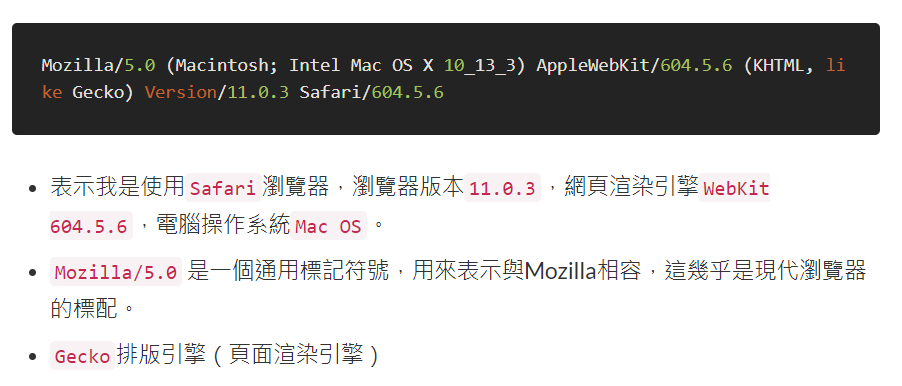

* If doesn't assign the header info, we can see the request is from python

In [7]:
import requests 

url = "http://httpbin.org/user-agent"
 
r = requests.get(url)
print(r.text)

{
  "user-agent": "python-requests/2.28.1"
}



#### requests's Cookie

* If HTTP's request need to add Cookie data, we can add Cookie parameter in get() method:

In [8]:
import requests 

url = "http://httpbin.org/cookies"

cookies = dict(name='Joe Chen')
r = requests.get(url, cookies=cookies)
print(r.text)

{
  "cookies": {
    "name": "Joe Chen"
  }
}



### 4-1-3 requests's POST

* in requests module, use get() method to send GET request, post() to send POST request. Ex:
* post_data is the python dict sending from the python form

In [9]:
import requests
	
post_data = {'name': 'Steven', 'grade': 100}
r = requests.post("http://httpbin.org/post", data=post_data)
print(r.text)


{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "grade": "100", 
    "name": "Steven"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "21", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.28.1", 
    "X-Amzn-Trace-Id": "Root=1-63803e6c-2c2c6d391d8597fd63990453"
  }, 
  "json": null, 
  "origin": "36.239.213.86", 
  "url": "http://httpbin.org/post"
}



## 4-2 Use Selenium to get online data

* If we find out JS will affect target data, we can use Selenium to retrive data (Selenium automated browser can fully excute JS program)

### Download & Install Selenium

#### Install Python's Selenium client API

In [10]:
pip install selenium

  Using cached selenium-4.6.0-py3-none-any.whl (5.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
from selenium import webdriver

#### Download & install browser driver
* Selenium control real browser through driver, ex:

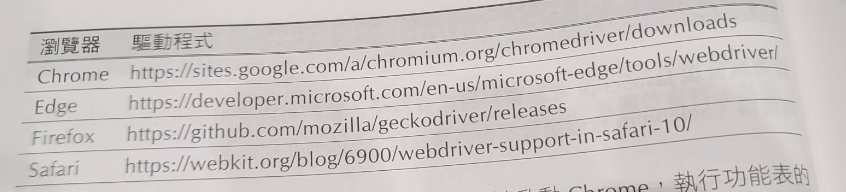

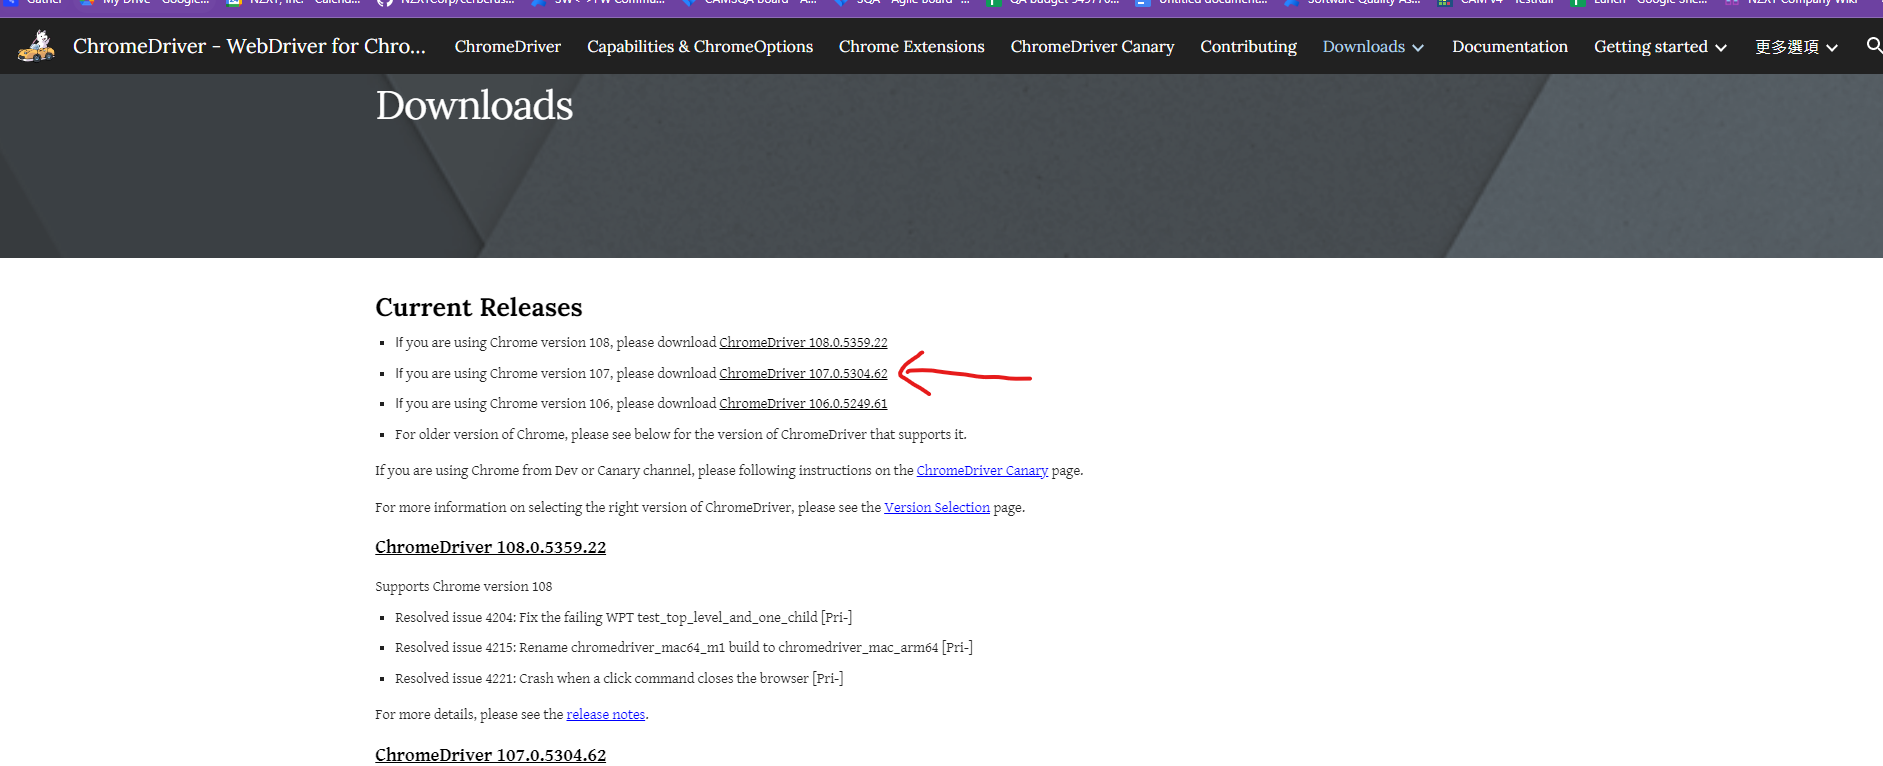

### 4-2-2 Use Selenium to get onlinedata

#### Use Selenium to get HTML content

* We use Chrome() to launch Chrome browser, (Firefox use Firefox() method)
* ref: https://zcgnotes.com/pythonselenium%E4%B8%89%E7%A8%AE%E7%AD%89%E5%BE%85%E6%96%B9%E5%BC%8F/

In [14]:
from selenium import webdriver
from time import sleep

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://fchart.github.io/test.html")
sleep(3)
print(driver.title)
html = driver.page_source
print(html)
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-eakA4xAE\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  after removing the cwd from sys.path.


測試的HTML5網頁
<html><head>
<meta charset="utf-8">
<title>測試的HTML5網頁</title>
</head>
<body>
<h3>從網路取得資料</h3><hr>
<div><p>使用Requests套件送出HTTP請求</p></div>

</body></html>


#### Add Cookie on Webdriver

* Many websites have content rating, ex: PTT's Gossiping

https://www.ptt.cc/bbs/Gossiping/M.1667236084.A.47C.html

* Open the dev Tool:
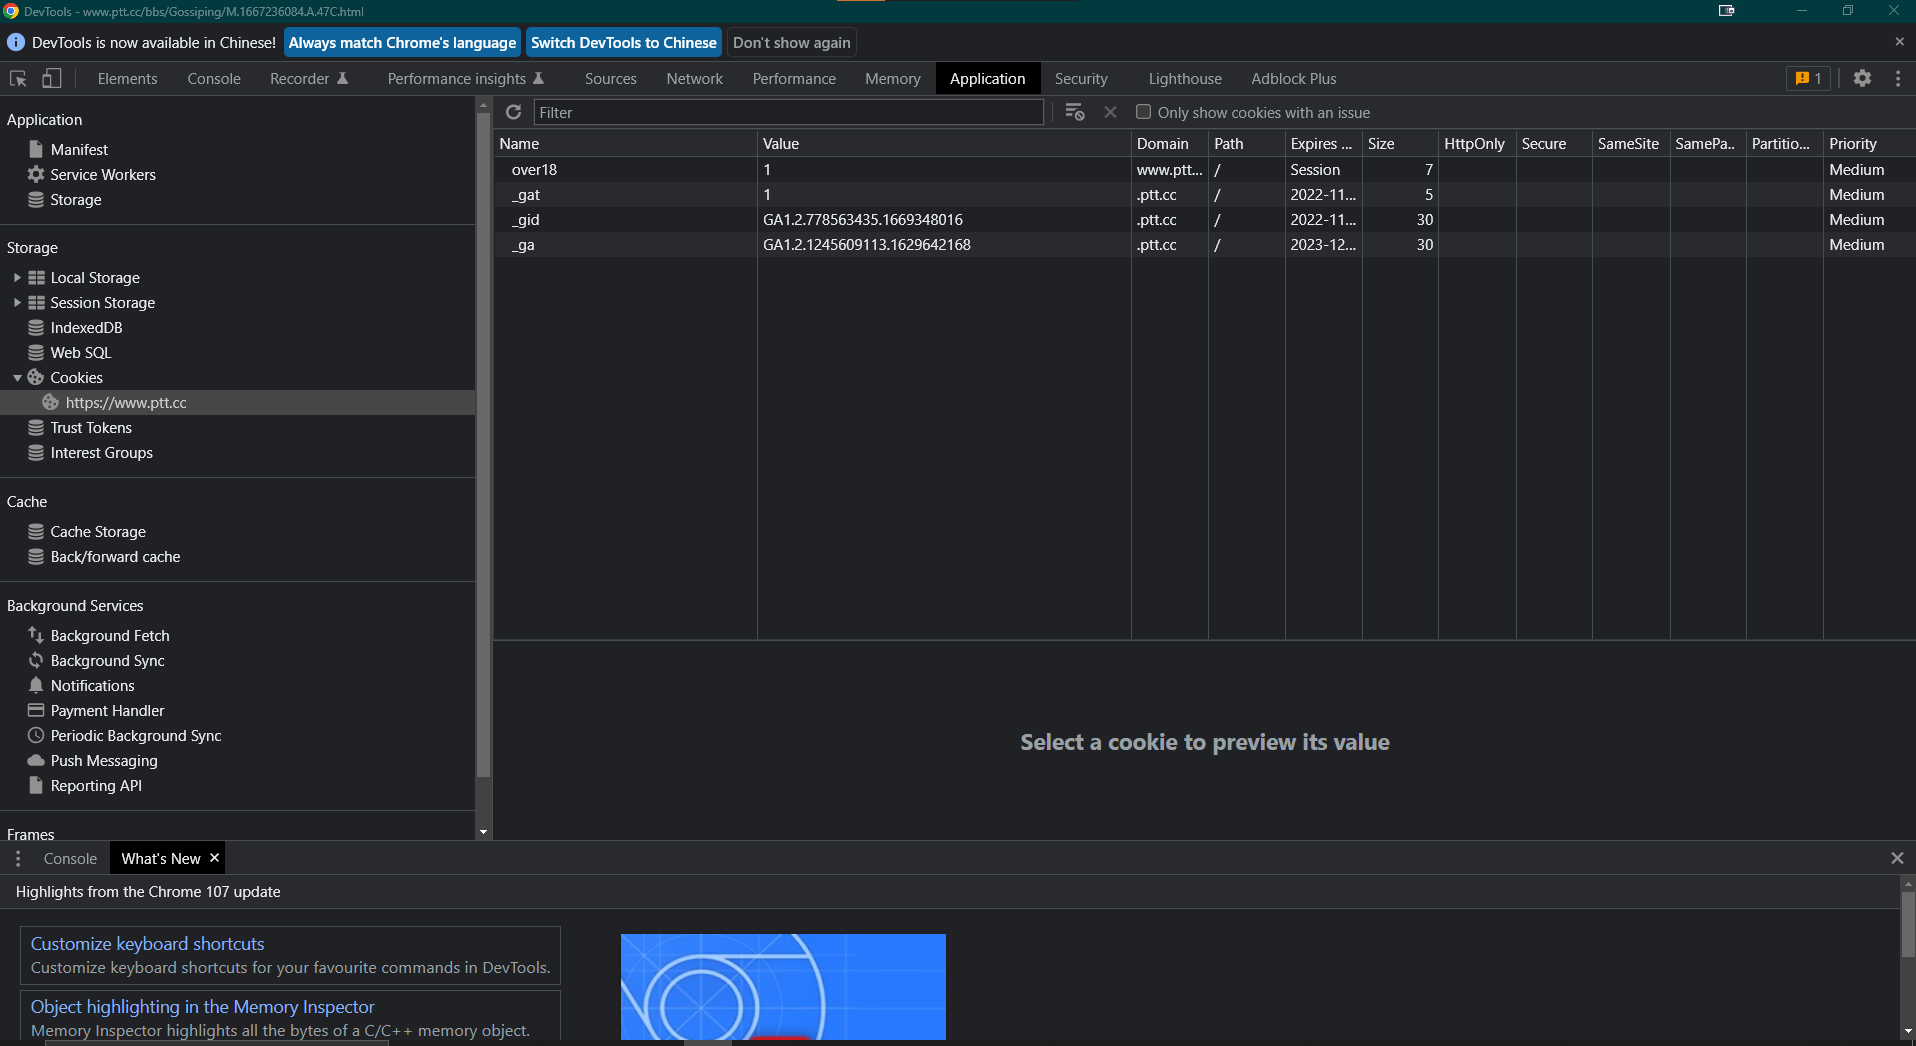

* We can add this Cookie for Webdriver:
1. Without adding cookie:

In [38]:
from selenium import webdriver

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")
sleep(3)
print(driver.title)
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-eakA4xAE\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  This is separate from the ipykernel package so we can avoid doing imports until


批踢踢實業坊


2. Add Cookie:

In [40]:
from selenium import webdriver

driver = webdriver.Chrome("./chromedriver")
driver.implicitly_wait(10)
cookie = {"name": "over18", "value": "1"}
driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")
driver.add_cookie(cookie)
sleep(3)
driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")
sleep(3)
print(driver.title)
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-eakA4xAE\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  This is separate from the ipykernel package so we can avoid doing imports until


看板 Gossiping 文章列表 - 批踢踢實業坊


* requests module also can add Cookies 
1. Without adding Cookie:

In [41]:
import requests 

url = "https://www.ptt.cc/bbs/Gossiping/index.html"

r = requests.get(url)
print(r.text)


<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	</head>
    <body>
		
<div class="bbs-screen bbs-content">
    <div class="over18-notice">
        <p>本網站已依網站內容分級規定處理</p>

        <p>警告︰您即將進入之看板內容需滿十八歲方可瀏覽。</p>

        <p>若您尚未年滿十八歲，請點選離開。若您已滿十八歲，亦不可將本區之內容派發、傳閱、出售、出租、交給或借予年齡未滿18歲的人士瀏覽，或將本網站內容向該人士出示、播放或放映。</p>
    </div>
</div>

<div class="bbs-screen bbs-content center clear">
    <form action="/ask/over18"

* 2. Compare with adding Cookie: 

In [42]:
import requests 

url = "https://www.ptt.cc/bbs/Gossiping/index.html"

cookies = { "over18": "1" }
r = requests.get(url, cookies=cookies)

print(r.text)


<!DOCTYPE html>
<html>
	<head>
		<meta charset="utf-8">
		

<meta name="viewport" content="width=device-width, initial-scale=1">

<title>看板 Gossiping 文章列表 - 批踢踢實業坊</title>

<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">
<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">




	</head>
    <body>
		
<div id="topbar-container">
	<div id="topbar" class="bbs-content">
		<a id="logo" href="/bbs/">批踢踢實業坊</a>
		<span>&rsaquo;</span>
		<a class="board" href="/bbs/Gossiping/index.html"><span class="board-label">看板 </span>Gossiping</a>
		<a class="right small" href="/about.html">關於我們</a>
		<a class="right small" href="/co

#### Use Headless mode's Chrome browser

* Chrome has built-in Headless mode

In [43]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--headless")
driver = webdriver.Chrome("./chromedriver", options=options)
driver.implicitly_wait(10)
driver.get("https://fchart.github.io/test.html")
print(driver.title)
html = driver.page_source
print(html)
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-eakA4xAE\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


測試的HTML5網頁
<html><head>
<meta charset="utf-8">
<title>測試的HTML5網頁</title>
</head>
<body>
<h3>從網路取得資料</h3><hr>
<div><p>使用Requests套件送出HTTP請求</p></div>

</body></html>


In [45]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--headless")
driver = webdriver.Chrome("./chromedriver", options=options)
driver.implicitly_wait(10)
driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")
print(driver.title)
driver.quit()

C:\Users\steve\.virtualenvs\python-web-crawler-eakA4xAE\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


批踢踢實業坊
